HOUSE PRICE PREDICTION

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [3]:
train = pd.read_csv("D:/ML/datasets/house prise/train.csv") #Load train data (Write train.csv directory)
test = pd.read_csv("D:/ML/datasets/house prise/test.csv") #Load test data (Write test.csv directory)

data = train.append(test,sort=False) #Make train set and test set in the same data set

data #Visualize the DataFrame data

C:\Users\DELL\AppData\Local\Temp\ipykernel_6272\3894853236.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = train.append(test,sort=False) #Make train set and test set in the same data set


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,NaN
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,NaN
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml,NaN
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,NaN


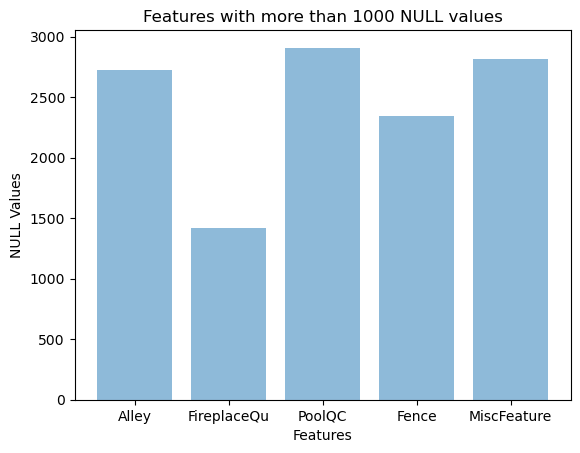

In [4]:
#Plot features with more than 1000 NULL values

features = []
nullValues = []
for i in data:
    if (data.isna().sum()[i])>1000 and i!='SalePrice':
        features.append(i)
        nullValues.append(data.isna().sum()[i])
y_pos = np.arange(len(features)) 
plt.bar(y_pos, nullValues, align='center', alpha=0.5)
plt.xticks(y_pos, features)
plt.ylabel('NULL Values')
plt.xlabel('Features')
plt.title('Features with more than 1000 NULL values')
plt.show()

In [5]:
#Dealing with NULL values

data = data.dropna(axis=1, how='any', thresh = 1000) #Drop columns that contain more than 1000 NULL values
data = data.fillna(data.mean()) #Replace NULL values with mean values
data


C:\Users\DELL\AppData\Local\Temp\ipykernel_6272\2322274126.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data = data.fillna(data.mean()) #Replace NULL values with mean values


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500.00000
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500.00000
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500.00000
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000.00000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,6,2006,WD,Normal,180921.19589
1455,2916,160,RM,21.0,1894,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,4,2006,WD,Abnorml,180921.19589
1456,2917,20,RL,160.0,20000,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2006,WD,Abnorml,180921.19589
1457,2918,85,RL,62.0,10441,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,700,7,2006,WD,Normal,180921.19589


In [6]:
#Dealing with NULL values

data = pd.get_dummies(data) #Convert string values to integer values

In [7]:
#Drop features that are correlated to each other

covarianceMatrix = data.corr()
listOfFeatures = [i for i in covarianceMatrix]
setOfDroppedFeatures = set() 
for i in range(len(listOfFeatures)) :
    for j in range(i+1,len(listOfFeatures)): #Avoid repetitions 
        feature1=listOfFeatures[i]
        feature2=listOfFeatures[j]
        if abs(covarianceMatrix[feature1][feature2]) > 0.8: #If the correlation between the features is > 0.8
            setOfDroppedFeatures.add(feature1) #Add one of them to the set
#I tried different values of threshold and 0.8 was the one that gave the best results

data = data.drop(setOfDroppedFeatures, axis=1)

In [8]:
#Drop features that are not correlated with output

nonCorrelatedWithOutput = [column for column in data if abs(data[column].corr(data["SalePrice"])) < 0.045]
#I tried different values of threshold and 0.045 was the one that gave the best results

data = data.drop(nonCorrelatedWithOutput, axis=1)

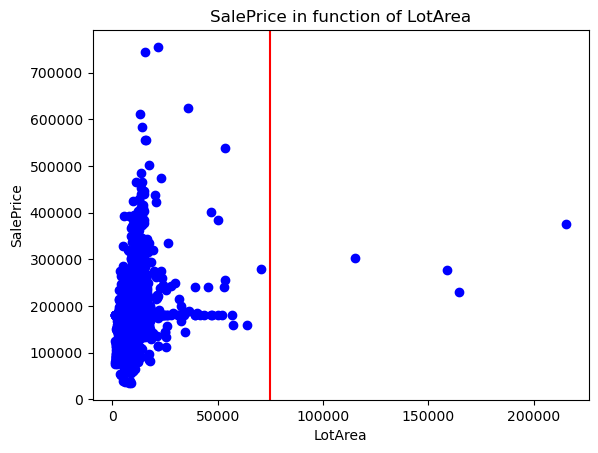

In [9]:
#Plot one of the features with outliers

plt.plot(data['LotArea'], data['SalePrice'], 'bo')
plt.axvline(x=75000, color='r')
plt.ylabel('SalePrice')
plt.xlabel('LotArea')
plt.title('SalePrice in function of LotArea')
plt.show()

In [10]:
#First, we need to seperate the data (Because removing outliers ⇔ removing rows, and we don't want to remove rows from test set)

newTrain = data.iloc[:1460]
newTest = data.iloc[1460:]

#Second, we will define a function that returns outlier values using percentile() method

def outliers_iqr(ys):
    quartile_1, quartile_3 = np.percentile(ys, [25, 75]) #Get 1st and 3rd quartiles (25% -> 75% of data will be kept)
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * 1.5) #Get lower bound
    upper_bound = quartile_3 + (iqr * 1.5) #Get upper bound
    return np.where((ys > upper_bound) | (ys < lower_bound)) #Get outlier values

#Third, we will drop the outlier values from the train set

trainWithoutOutliers = newTrain #We can't change train while running through it
for column in newTrain:
    outlierValuesList = np.ndarray.tolist(outliers_iqr(newTrain[column])[0]) #outliers_iqr() returns an array
    trainWithoutOutliers = newTrain.drop(outlierValuesList) #Drop outlier rows
    
trainWithoutOutliers = newTrain

In [11]:
X = trainWithoutOutliers.drop("SalePrice", axis=1) #Remove SalePrice column
Y = np.log1p(trainWithoutOutliers["SalePrice"]) #Get SalePrice column {log1p(x) = log(x+1)}
reg = LinearRegression().fit(X, Y)

In [12]:
#Make prediction

newTest = newTest.drop("SalePrice", axis=1) #Remove SalePrice column
pred = np.expm1(reg.predict(newTest))

#Submit prediction

sub = pd.DataFrame() #Create a new DataFrame for submission
sub['Id'] = test['Id']
sub['SalePrice'] = pred
sub.to_csv("submission.csv", index=False) #Convert DataFrame to .csv file

sub #Visualize the DataFrame sub

,Id,SalePrice
0,1461,123897.803894
1,1462,152728.451200
2,1463,173445.692251
3,1464,196479.978387
4,1465,209124.810780
...,...,...
1454,2915,79850.086312
1455,2916,84285.816973
1456,2917,163147.211837
1457,2918,122905.037223
